In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load data of togo

In [ ]:
file_path = "../data/togo.csv"
df = pd.read_csv(file_path)
print(df.shape)

In [ ]:
print( " the first five rows")
print(df.head())
print(" the last five rows")
print(df.tail())
print( " five random entries")
df.sample(5)

In [ ]:
# Information about the dataset
df.info()

In [ ]:
# descriptive statistics on numerical columns
df.describe()

In [ ]:
print("check missing values")
df.isna().sum()

# descriptive statistics of both categorical and numerical columns

In [ ]:
df.describe(include="all")

In [ ]:
# lets go for duplicate rows
# duplicated().sum() is used to identify and sum duplicated rows for both numerical and categorical columns
number_of_duplicates = df.duplicated().sum()
print(f"duplicated entries are: {number_of_duplicates}")

# cardinallity (uniqueness) of categoricalls. 

In [ ]:
categorical_column = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {crd:df[crd].nunique() for crd in categorical_column}
print (cardinality)

# cardinality of both categoricals and numercal columns

In [ ]:
categorical_column = df.select_dtypes(include=["object", "category", "float64", "int64"]).columns.tolist()
cardinality = {crd:df[crd].nunique() for crd in categorical_column}
print (cardinality)

In [ ]:
# Identifying columns with missing values greater than 5 percent
missing_percent = df.isnull().mean()*100
missing_greater_than_five_percent = missing_percent[missing_percent>5]
print(missing_greater_than_five_percent)

In [ ]:
#Check for invalid data types
# For example, a numeric column should only contain numbers.

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    invalid = df[~df[col].apply(lambda x: isinstance(x, (int, float)))]
    if not invalid.empty:
        print(f"Invalid entries in {col}:")
        print(invalid)

# Univariate Analysis

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c],kde=True)
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.show()

In [ ]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert =True)
    plt.title(f"box plot of {c}")
    plt.ylabel(c)
    plt.show()

# Outlier Detection

In [ ]:
# before calculating Z score, first we have to remove columns that have NaN values

df.dropna(axis=1, how="all", inplace=True)

In [ ]:
# Z score method. it is know that this method is only for numerical columns. 
# the most common threshold value of z is 3. if z is above 3, so , that particular cell value is an outlier

num_cols = df.select_dtypes(include= [np.number]).columns.tolist() # num_cols is a list of numeric column names
z_scores = np.abs(stats.zscore(df[num_cols]))
threshold = 3
outliers = (z_scores>threshold)
outler_counts = pd.DataFrame(outliers, columns=num_cols).sum()
print(outler_counts)

In [ ]:
# Now lets keep rows whose z score value is less than or equal to 3

df_clean = df[(z_scores<=3).all(axis=1)]
# size of the  cleaned data
df_clean.shape

In [ ]:
# lets export the cleaned data
df_clean.to_csv("../data/cleaned_data_sierralone.csv", index = False)

# Time Analysis

In [ ]:
# Line charts of GHI, DNI, DHI, Tamb Vs Timestamp
# I have to ensure if the timestamp column is in a standard date time format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
plt.Figure(figsize=(15,6))
for col in columns_to_plot:
    plt.plot(df['Timestamp'], df[col], label = col)
    plt.xlabel('Timestamp')
    plt.ylabel('values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Lets observe patterns by month, we need to extract the month from Timestamp column and then aggregate the data by mean per month.
df['Month'] = df['Timestamp'].dt.month  # .dt.month extracts the month as an integer (1 for January, 2 for February).
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly_avg.index, monthly_avg[col], marker='o', label=col)

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Pattern of Solar and Temperature Variables')
plt.legend()
plt.show()

In [ ]:
# Cleaning Impact

In [ ]:
# Group by Cleaning column and compute mean of ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_impact)

# Correlations and Relationship Analysis

In [ ]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

for col in ['WS', 'WSgust', 'WD']:
    plt.Figure(figsize=(6,4))
    plt.scatter(df[col], df['GHI'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.title(f'{col} vs GHI')
    plt.show()

In [ ]:
for col in ['Tamb', 'GHI']:
    plt.figure(figsize=(6,4))
    plt.scatter(df['RH'], df[col], alpha=0.5)
    plt.xlabel('RH')
    plt.ylabel(col)
    plt.title(f'RH vs {col}')
    plt.show()

In [ ]:
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
# Compute correlation matrix
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Wind & Distribution Analysis

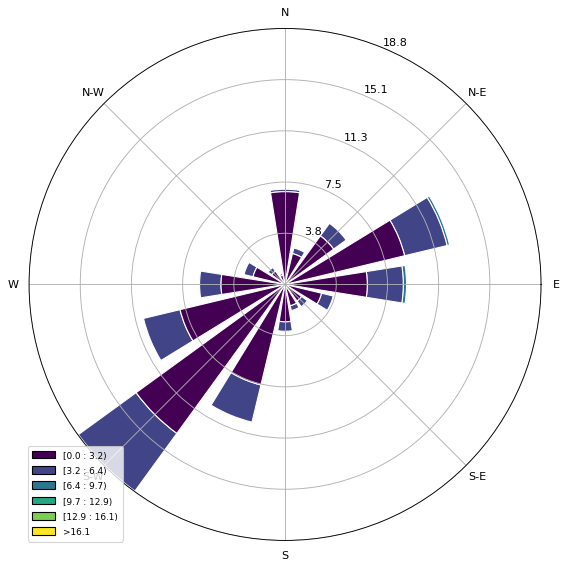

In [15]:
# Wind rose or radial bar plot of WS/WD.
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

In [ ]:
# Histogram + density for GHI
sns.histplot(df['GHI'], kde=True, bins=30, color='skyblue')
plt.title('Histogram & Density of GHI')
plt.show()

# Histogram + density for WS
sns.histplot(df['WS'], kde=True, bins=30, color='salmon')
plt.title('Histogram & Density of WS')
plt.show()

# Temperature Analysis

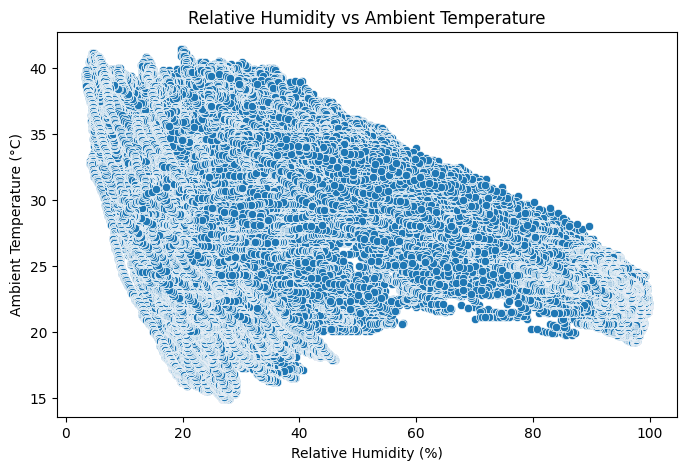

In [16]:
# Examine how relative humidity (RH) might influence temperature readings and solar radiation.
plt.figure(figsize=(8,5))
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

# Bubble Chart

In [ ]:
# GHI vs. Tamb with bubble size = RH or BP.
plt.figure(figsize=(10,6))

# Bubble chart
plt.scatter(
    x=df['GHI'], 
    y=df['Tamb'], 
    s=df['RH'],           # Bubble size
    alpha=0.5,            # Transparency
    c='gray',             # Bubble color
    edgecolor='k'         # Bubble edge color
)

plt.title('GHI vs Ambient Temperature with Bubble Size = RH')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()